In [1]:
from Basics import *
setplot(dark=True)

import Measurements, SHMRs, HMFs, HODs, Profiles, SMFs, FFTs, ForwardModel

# Measurements

<ErrorbarContainer object of 3 artists>

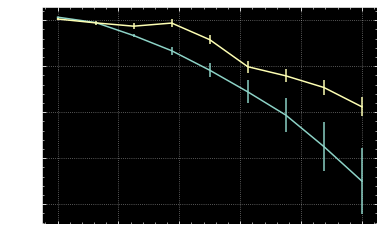

In [17]:
Schaan2021 = Measurements.Schaan2021()
Liu2025 = Measurements.Liu2025(bin='pz2', dBeta='dBeta_1.2_10.7')
Liu2025.tSZdata_in_muK(T_CMB=2.725)

plt.errorbar(Schaan2021.thetas, Schaan2021.tSZdata, Schaan2021.tSZerr)
plt.errorbar(Liu2025.thetas, Liu2025.tSZdata, Liu2025.tSZerr)

# Stellar Mass Functions

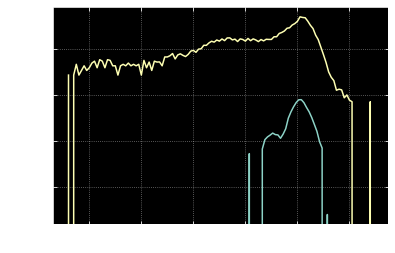

In [37]:
DESILRGs = SMFs.DESILRGs(bin='bin_1', hemisphere='south')
DR10CMASS = SMFs.DR10CMASS('portsmouth', 'passive', 'krou')

plt.loglog(DESILRGs.mstars, np.sum(DESILRGs.SMF, axis=1))
plt.loglog(DR10CMASS.mstars, np.sum(DR10CMASS.SMF, axis=1))

# Stellar Halo Mass Relations

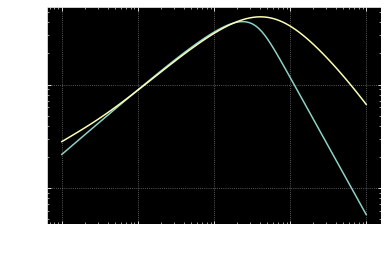

In [ ]:
Gao2023 = SHMRs.Gao2023(sample='ELG_Auto')
Kravstov2018 = SHMRs.Kravstov2018(sample='M200c')

mstars = np.logspace(8, 12, 100)
plt.loglog(mstars, mstars/Gao2023.SHMR(mstars)())
plt.loglog(mstars, mstars/Kravstov2018.SHMR(mstars)())

# Halo Occupancy Distributions

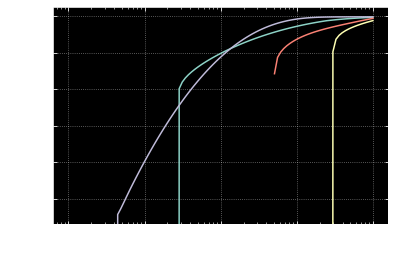

In [75]:
Kou2023 = HODs.Kou2023(sample="M*>10.8")
Yuan2023 = HODs.Yuan2023(sample="LRG 0.4<z<0.6")

mhalos = np.logspace(10, 14, 100)
plt.loglog(mhalos, Kou2023.Nc(mhalos)())
plt.loglog(mhalos, Kou2023.Ns(mhalos)())

plt.loglog(mhalos, Yuan2023.Nc(mhalos)())
plt.loglog(mhalos, Yuan2023.Ns(mhalos)())

# Halo Mass Functions

# Profiles

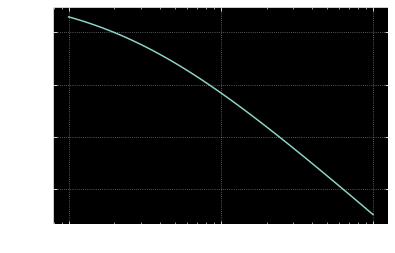

In [84]:
PthB12 = Profiles.PthB12('B12')

cosmopars = {'Omega_m': 0.3, 'Omega_b': 0.044, 'XH': 0.76}
cosmology = astropy.cosmology.LambdaCDM(H0=100*0.7, Tcmb0=2.726, Om0=0.3, Ode0=0.7, Ob0=0.044)
rhoc_func = lambda z: cosmology.critical_density(z).to(u.Msun/u.Mpc**3).value
r200c_func = lambda m200c, z: (m200c/(4/3*np.pi*200*rhoc_func(z)))**(1/3)

rs = np.logspace(-1, 1, 100)
ms = np.logspace(12, 14, 50)
zs = np.linspace(0.4, 1.1, 10)
plt.loglog(rs, PthB12.Pth1h(rs, m200c=ms, z=zs, rhocrit_func=rhoc_func, r200c_func=r200c_func, cosmopars=cosmopars)()[:, 25, 2])

In [72]:
del sys.modules['HODs']  # Clear the cache to avoid conflicts
import HODs